In [14]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/Mixture + Analytes/8 Mixtures')

from utils import plot_pca_decision_boundary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import re

os.chdir('/home/soham/Desktop/GitHub/BTP/')

## Without 112 & 121

In [5]:
all_data = pd.read_excel('data/mixture/8 solutions/total_new_data(8 mixtures).xlsx')
all_data = all_data[all_data['Label']!='Mix_112'][all_data['Label']!='Mix_121']

true_labels = all_data['Label']
labels = true_labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_121':5, 'Mix_211':6, 'Mix_112':7})

all_data = all_data.drop(['Dilution','Label'], axis=1)

pca = PCA(n_components=2)
pca.fit(all_data)

pca_data = pd.read_excel('data/mixture/8 solutions/PCA_without_112_121.xlsx')
pca_data.head()

/tmp/ipykernel_421275/2508148972.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data = all_data[all_data['Label']!='Mix_112'][all_data['Label']!='Mix_121']


,PC1,PC2,Labels
0,-91.198957,81.747571,A1
1,-125.743267,64.585973,A1
2,-149.612093,8.177297,A1
3,-161.555537,-5.390276,A1
4,-164.861610,-8.026516,A1


In [6]:
X = pca_data[['PC1','PC2']]
Y = pca_data['Labels'].map({'Mix_101':0, 'A1':1, 'A2':2, 'A3':3, 'Mix_111':4, 'Mix_211':5})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Training accuracy

train_pred = svm.predict(X_train)
print(f'Training accuracy = {accuracy_score(train_pred, Y_train)}')


# Testing accuracy

test_pred = svm.predict(X_test)
print(f'Testing accuracy = {accuracy_score(test_pred, Y_test)}')

Training accuracy = 0.9583333333333334
Testing accuracy = 0.6666666666666666


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


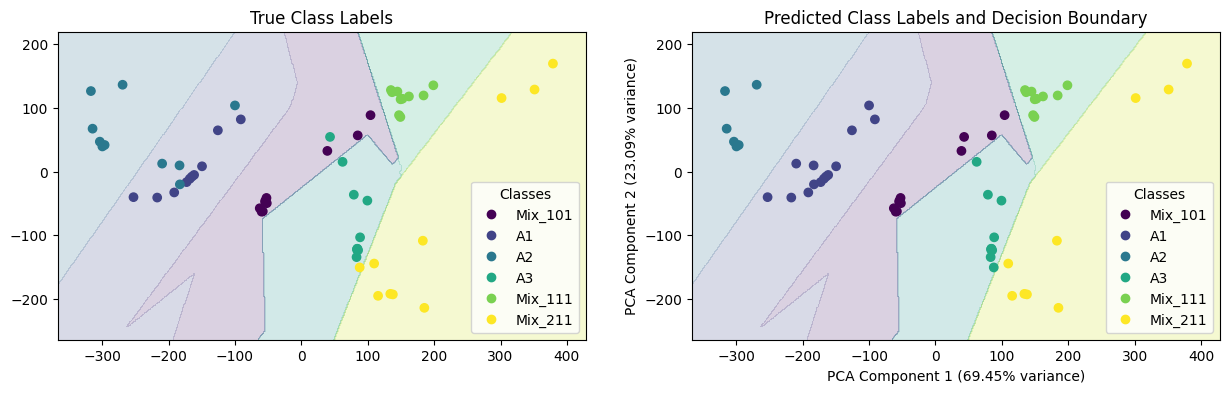

In [7]:
label_mapping = {0: 'Mix_101', 1: 'A1', 2: 'A2', 3: 'A3', 4: 'Mix_111', 5:'Mix_211'}
plot_pca_decision_boundary(pca, pca_data, svm, label_mapping)

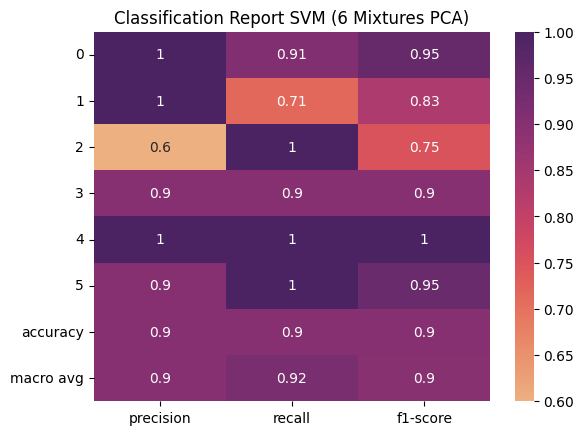

In [9]:
''' Confusion matrix '''

predictions = svm.predict(X)

report = classification_report(predictions, Y, output_dict=True)
report = pd.DataFrame(report).transpose()

sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='flare')
plt.title('Classification Report SVM (6 Mixtures PCA)')
plt.show()

## With 112 & 121

In [15]:
all_data = pd.read_excel('data/mixture/8 solutions/total_new_data(8 mixtures).xlsx')

true_labels = all_data['Label']
labels = true_labels.map({'Mix_101': 0, 'A1': 1, 'A2': 2, 'A3': 3, 'Mix_111':4, 'Mix_121':5, 'Mix_211':6, 'Mix_112':7})

all_data = all_data.drop(['Dilution','Label'], axis=1)

pca = PCA(n_components=2)
pca.fit(all_data)

pca_data = pd.read_excel('data/mixture/8 solutions/PCA_with_112_121.xlsx')
pca_data.head()

,PC1,PC2,Labels
0,-187.890728,-7.931970,A1
1,-202.043966,-42.657566,A1
2,-185.621412,-92.832078,A1
3,-189.646498,-106.343482,A1
4,-192.093846,-108.870334,A1


In [16]:
X = pca_data[['PC1','PC2']]
Y = pca_data['Labels'].map({'Mix_101':0, 'A1':1, 'A2':2, 'A3':3, 'Mix_111':4, 'Mix_211':5, 'Mix_112':6, 'Mix_121':7})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Training accuracy

train_pred = svm.predict(X_train)
print(f'Training accuracy = {accuracy_score(train_pred, Y_train)}')


# Testing accuracy

test_pred = svm.predict(X_test)
print(f'Testing accuracy = {accuracy_score(test_pred, Y_test)}')

Training accuracy = 0.875
Testing accuracy = 0.6875


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


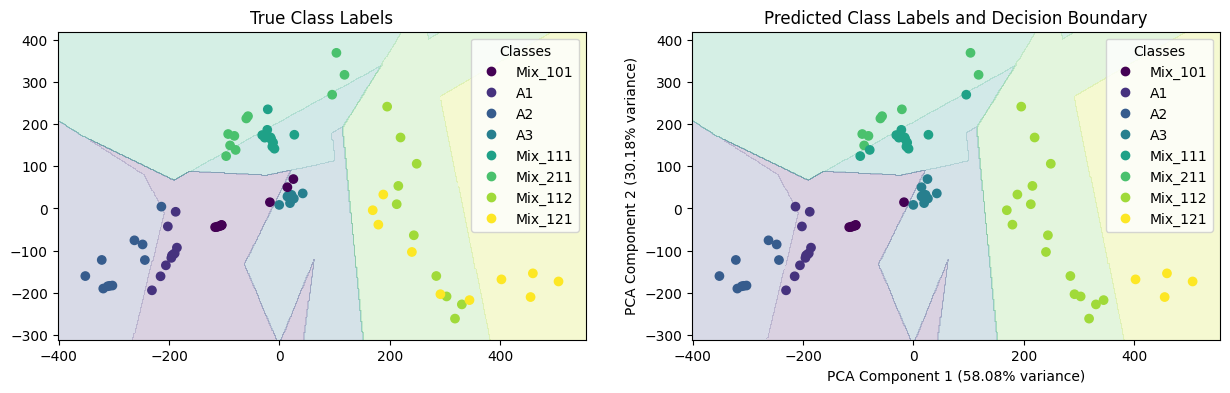

In [17]:
label_mapping = {0: 'Mix_101', 1: 'A1', 2: 'A2', 3: 'A3', 4: 'Mix_111', 5:'Mix_211', 6:'Mix_112', 7:'Mix_121'}
plot_pca_decision_boundary(pca, pca_data, svm, label_mapping)

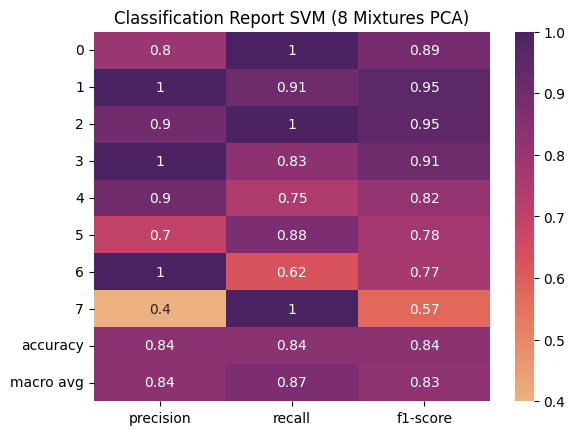

In [18]:
''' Confusion matrix '''

predictions = svm.predict(X)

report = classification_report(predictions, Y, output_dict=True)
report = pd.DataFrame(report).transpose()

sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='flare')
plt.title('Classification Report SVM (8 Mixtures PCA)')
plt.show()